## Bike Rental Daily Count Prediction

### Data Understanding and Preparation

In [5]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Reading dataset
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Identifying Catagorical and continuous variables


<i> Catagorical variables: </i>
    1. instant [Equivalent to index for the dataset]
    2. dteday [Date; not a continuous variable]
    3. season [There are 4 seasons mentioned in the data dictionary i.e., spring,summer, fall and winter]
    4. yr [There are 2 years mentioned in the data dictionary i.e., 2018 & 2019]
    5. mnth [There are 12 months mentioned in the data dictionary i.e., 1 to 12]
    6. holiday [There are 2 values mentioned in the data dictionary i.e., holiday or not a holiday]
    7. weekday [There are 2 values mentioned in the data dictionary i.e., workingday or not a workingday]
    8. weathersit [There are 4 weather situations mentioned in the data dictionary i.e., clear,cloudy, light rain/snow and heavy rain/snow]
    
<i> Continuous Variables: </i>
    1. temp [average temparature in Calcius of a day]
    2. atemp [average feels like temperature in Calcius for a day]
    3. hum [average relative humdidity for a day]
    4. windspeed [average speed of wind for a day]
    5. casual [number of non-registered users opting to use Bikes from Boombikes]
    6. registered [number of registered users opting to use Bikes from Boombikes]
    7. cnt [sum of casual and registered ; TARGET variable]

#### Dropping the un-necessary columns

In [7]:
# Dropping 'isntant' since it is eqivalent to index for the dataset
# Dropping 'dteday' since it is date for the observation, which may not be helpful in multiple linear regression.
# Dropping 'casual' & 'regsisted' since 'cnt' is sum of 'casual' & 'registered' ,and multicollinearity should be avoided. 
data.drop(columns = ['instant','dteday','casual','registered'],inplace = True)

#### Checking Datatype of columns in the dataset & updating datatypes if required

In [8]:
# Checking datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
# Converting catagorical columns into object datatype to create dummy variables later
cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
data[cat_col] = data[cat_col].astype(str)
# Checking datatype of database columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [10]:
# Mapping catagorical variables for ease in understanding catagorical columns while data visualisation
data.season = data.season.map({'1':'spring' , '2':'summer' , '3':'fall' , '4': 'winter'})
data.yr = data.yr.map({'0':'2018' , '1':'2019'})
data.mnth = data.mnth.map({'1':'Jan','2':'Feb','3':'Mar','4': 'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep'
                            , '10':'Oct','11':'Nov','12':'Dec'})
data.holiday = data.holiday.map({'0':'no' , '1':'yes'})
data.weekday = data.weekday.map({'0':'Sun','1':'Mon','2':'Tue','3':'Wed','4':'Thur','5':'Fri','6':'Sat'})
data.workingday = data.workingday.map({'0':'no','1':'yes'})
data.weathersit = data.weathersit.map({'1':'clear','2':'cloudy','3':'light rain/snow','4':'heavy rain/snow'})

### Data Visualisation

#### Categorical Variables

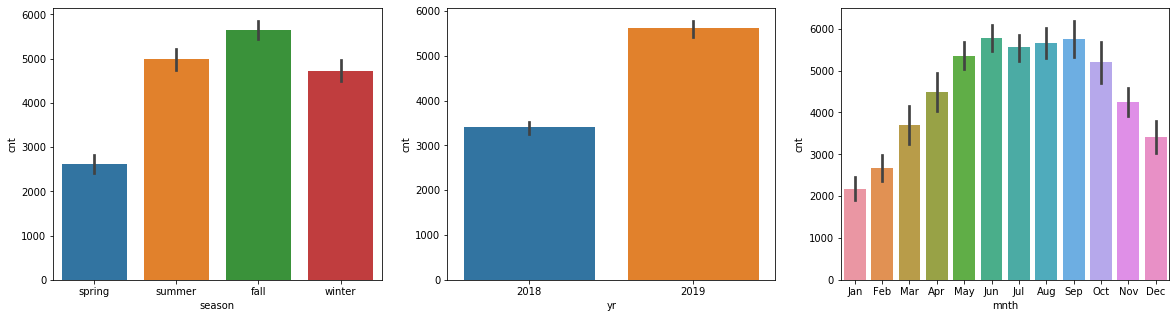

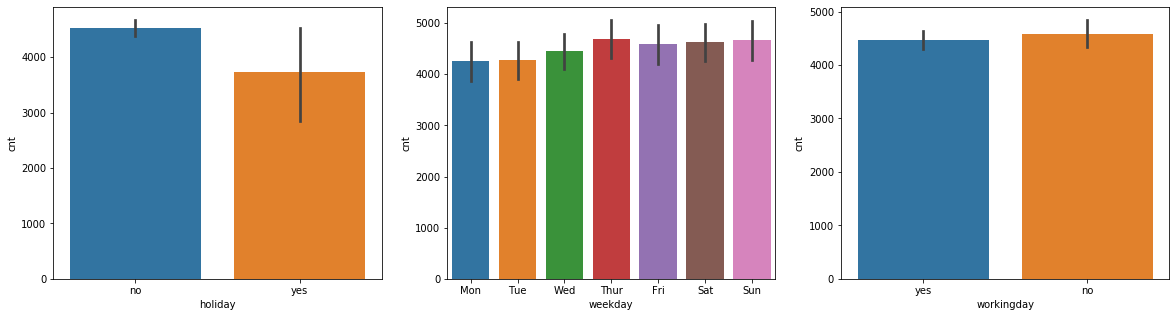

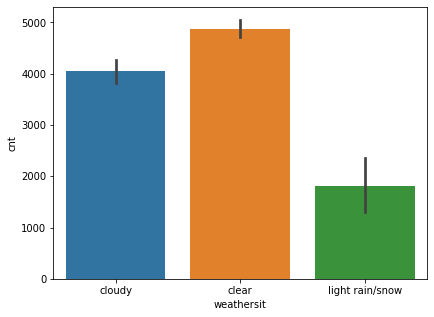

In [11]:
# Plotting barplots for categorical independent variables
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = [20,5])
sns.barplot(y = data.cnt,x = data.season,ax = ax1)
sns.barplot(y = data.cnt,x = data.yr,ax = ax2)
sns.barplot(y = data.cnt,x = data.mnth,ax = ax3)

plt.show()
fig,(ax4,ax5,ax6) = plt.subplots(1,3,figsize = [20,5])
sns.barplot(y = data.cnt,x = data.holiday,ax = ax4)
sns.barplot(y = data.cnt,x = data.weekday,ax = ax5)
sns.barplot(y = data.cnt,x = data.workingday,ax = ax6)

plt.show()
plt.subplots(1,1,figsize = [6.7,5])
sns.barplot(y = data.cnt,x = data.weathersit)

plt.show()

<u> Inferences based on Categorical columns: </u>
     
SEASONS : Out of all the seasons, fall show the highest count of boombike users followed by summer.<br>
YEAR : 2019 has more number of boombike users as compared to 2018.<br>
MONTHS : Jun to September has the highest numbers of boombike users throughout the year.<br>
HOLIDAYS : Higher number of users are observed in holidays as compared to non-holidays.<br>
WEEKDAY : Mid-week i.e., Thursday seems to have the highest number of boombike users throughout the week.<br>
WORKING DAY : Number of users donot seem to change much with respect to working day.<br>
WEATHER SITUATION : Highest number of users are observed in clear weather, followed by cloudy and followed by light rain/snow.<br>

#### Continuous Variables

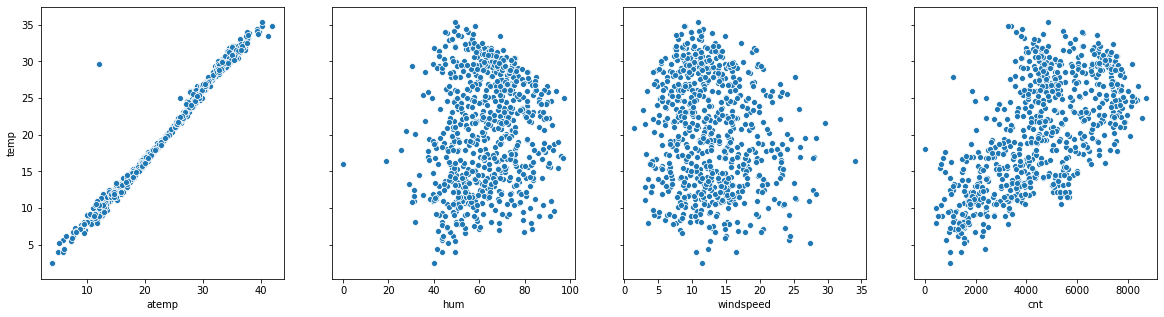

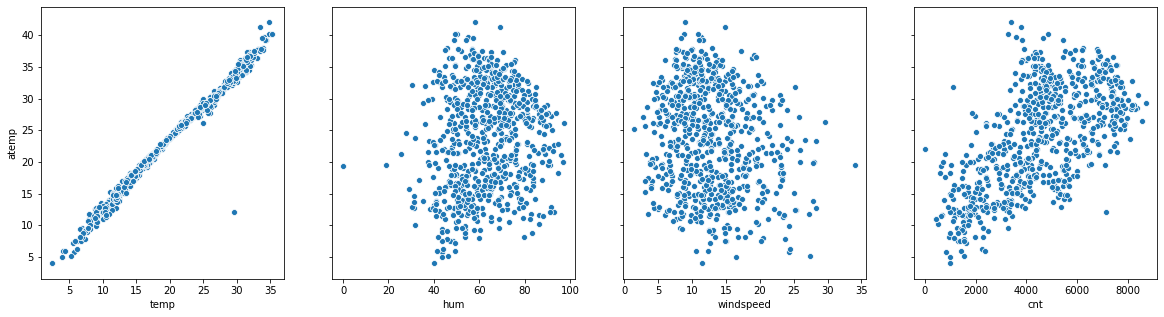

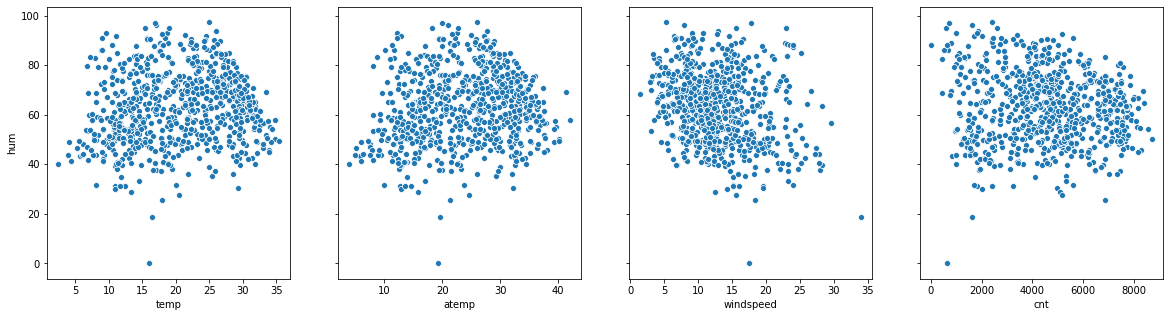

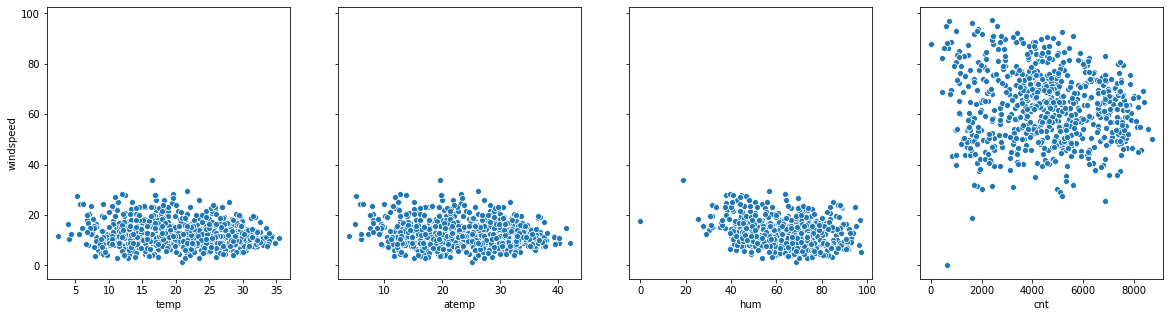

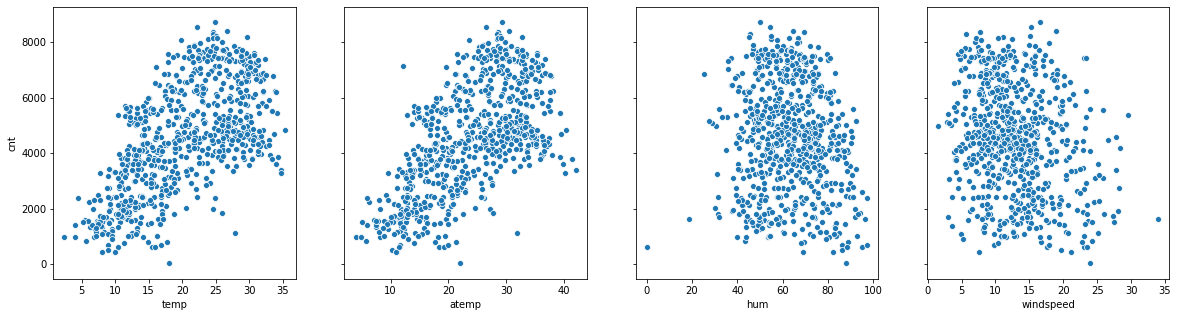

In [12]:
# Plotting scatter plots for continuous independent variables ['atemp','temp','hum','windspeed']
# Seaborn Pairplot can also be used for similar task.
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = [20,5],sharey = True)
sns.scatterplot(x = data.atemp,y = data.temp,ax = ax1)
sns.scatterplot(x = data.hum,y = data.temp,ax = ax2)
sns.scatterplot(x = data.windspeed,y = data.temp,ax = ax3)
sns.scatterplot(x = data.cnt,y = data.temp,ax = ax4)
plt.show()

fig,(ax5,ax6,ax7,ax8) = plt.subplots(1,4,figsize = [20,5],sharey = True)
sns.scatterplot(x = data.temp,y = data.atemp,ax = ax5)
sns.scatterplot(x = data.hum,y = data.atemp,ax = ax6)
sns.scatterplot(x = data.windspeed,y = data.atemp,ax = ax7)
sns.scatterplot(x = data.cnt,y = data.atemp,ax = ax8)
plt.show()

fig,(ax9,ax10,ax11,ax12) = plt.subplots(1,4,figsize = [20,5],sharey = True)
sns.scatterplot(x = data.temp,y = data.hum,ax = ax9)
sns.scatterplot(x = data.atemp,y = data.hum,ax = ax10)
sns.scatterplot(x = data.windspeed,y = data.hum,ax = ax11)
sns.scatterplot(x = data.cnt,y = data.hum,ax = ax12)
plt.show()

fig,(ax13,ax14,ax15,ax16) = plt.subplots(1,4,figsize = [20,5],sharey = True)
sns.scatterplot(x = data.temp,y = data.windspeed,ax = ax13)
sns.scatterplot(x = data.atemp,y = data.windspeed,ax = ax14)
sns.scatterplot(x = data.hum,y = data.windspeed,ax = ax15)
sns.scatterplot(x = data.cnt,y = data.hum,ax = ax16)
plt.show()

fig,(ax17,ax18,ax19,ax20) = plt.subplots(1,4,figsize = [20,5],sharey = True)
sns.scatterplot(x = data.temp,y = data.cnt,ax = ax17)
sns.scatterplot(x = data.atemp,y = data.cnt,ax = ax18)
sns.scatterplot(x = data.hum,y = data.cnt,ax = ax19)
sns.scatterplot(x = data.windspeed,y = data.cnt,ax = ax20)
plt.show()

<u> Inferences based on Continuous columns: </u>
     
    1. temp and atemp are highly correlated to each other.
    2. temp and atemp has good correlation with cnt variable also.
    3. There is no specific pattern of humidity and windspeed with other variables.

<u> Checking correlation for the catagorical columns: </u>

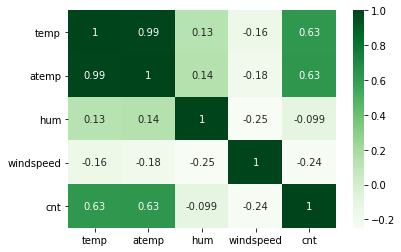

In [13]:
# PLotting heatmap for the continuous columns
sns.heatmap(data.corr(),annot = True,cmap = 'Greens')
plt.show()

<u> Inferences from heatmap for continuous variables : </u>
    1. There is 99% correlation between temp and atemp, so one of them must be removed to prevent multcollinearity.
    2. There is a good correlation of temp and atemp with cnt, which means one of temp or atemp can be used as a good predictor for cnt.
    3. There is negative correlation of atemp,temp & hum w.r.t. windspeed, as wind may reduce absolute, feels like temp and humidity.

### Data Preparation

#### Creating dummy variables for all the catagorical columns

In [14]:
# Creating dummy variables for catagorical variables having non-binary values i.e., non 0/1 or non yes/no. 
season = pd.get_dummies(data.season,drop_first = True)
mnth = pd.get_dummies(data.mnth,drop_first = True)
weekday = pd.get_dummies(data.weekday,drop_first = True)
weathersit = pd.get_dummies(data.weathersit,drop_first = True)

In [15]:
# Renaming Dataframe columns for better understanding
season.columns = ['summer','fall', 'winter']
mnth.columns = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weekday.columns = ['Mon','Tue','Wed','Thur','Fri','Sat']
weathersit.columns = ['Cloudy','LightThunderstorm']

In [16]:
# Concatenating the dummy columns to the dataset
df = pd.concat([season,mnth,weekday,weathersit,data],axis = 1)

# Dropping the original columns
df.drop(columns = ['season','mnth','weekday','weathersit'],inplace = True)

In [17]:
# Mapping 'yr','holiday' & 'workingday to original values
df.yr = df.yr.map({'2018':0 , '2019':1})
df.holiday = df.holiday.map({'no': 0 , 'yes': 1})
df.workingday = df.workingday.map({'no':0,'yes':1})

#### Dividing the dataset into train and test set

In [18]:
# importing required library for dataset split into train and test.
from sklearn.model_selection import train_test_split

In [19]:
# Splitting train-test datasets in 70:30 ratio.
df_train,df_test = train_test_split(df,test_size = 0.3,random_state = 100)

#### Scaling the datasets

In [20]:
# importing the required library
from sklearn.preprocessing import StandardScaler as scaler

In [21]:
# Creating an instance of Scaler class of sci-kit learn library
Scaler = scaler()

# Scaling the continuous columns
cont_col = ['temp','atemp','hum','windspeed','cnt']
df_train[cont_col] = Scaler.fit_transform(df_train[cont_col])
df_test[cont_col] = Scaler.transform(df_test[cont_col])

#### Dividing the dataset into X and y

In [22]:
# Splitting df_train into X and y
y_train = df_train.pop('cnt')
X_train = df_train

### Data Modeling and Evaluation

#### Creating a linear regression model

- Using RFE to segregate 15 features

In [23]:
# importing Linear regression class from sci-kit learn library
from sklearn.linear_model import LinearRegression

In [24]:
# Creating an instance of the Linear regression class and fitting it to X_train & y_train
lm = LinearRegression()
lm.fit(X_train,y_train)

# importing RFE from sci-kit learn library [it segregates features on the basis of magnitude of linear regression coeff.]
from sklearn.feature_selection import RFE

# Selecting 15 columns, creating rfe instance and fitting it to X_train and y_train.
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [25]:
# Columns selected by RFE
X_train.columns[rfe.support_]

# Keeping only the RFE columns
X_train = X_train[list(X_train.columns[rfe.support_])]

- Using p-value/vif/prob(F-statistic) approach for feature elimination

In [26]:
# importing libraries
import statsmodels.api as sm

#### Model-1

In [27]:
# Adding constant
X_train_sm = sm.add_constant(X_train)

# Using OLS cost function and fitting to training data
Model1 = sm.OLS(y_train,X_train_sm).fit()

# Printing model output
print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          4.11e-186
Time:                        10:32:38   Log-Likelihood:                -256.27
No. Observations:                 511   AIC:                             544.5
Df Residuals:                     495   BIC:                             612.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3552      0.06

In [28]:
# Check for the VIF values of the feature variables to find whether there is multicollinearity in current model or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.17
1,summer,5.64
14,temp,4.38
3,winter,3.70
2,fall,2.78
6,May,2.35
5,Apr,1.86
8,Oct,1.80
4,Mar,1.63
7,Jun,1.48


Observations:
    1. There is high multicollinearity in the model.
summer is the most explained column by other columns. It should be removed. 

#### Model-2

In [30]:
# Dropping 'summer'
X_train.drop(columns = 'summer',inplace = True)
X_train_sm = sm.add_constant(X_train)

# Using OLS cost function and fitting to training data
Model2 = sm.OLS(y_train,X_train_sm).fit()

# Printing model output
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          1.13e-185
Time:                        10:32:38   Log-Likelihood:                -260.04
No. Observations:                 511   AIC:                             550.1
Df Residuals:                     496   BIC:                             613.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4840      0.04

In [31]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.18
13,temp,2.95
5,May,2.24
2,winter,2.23
7,Oct,1.77
4,Apr,1.72
1,fall,1.71
3,Mar,1.63
6,Jun,1.42
8,Dec,1.23


Observations:
    1. All the features have low VIF value [minimal multicollinearity]
    2. p-value of Oct feature is the highest amoung all the features and 10 or lesser number of features are required in the model [should be dropped]

#### Model-3

In [32]:
# Dropping 'Oct'
X_train.drop(columns = 'Oct',inplace = True)
X_train_sm = sm.add_constant(X_train)

# Using OLS cost function and fitting to training data
Model3 = sm.OLS(y_train,X_train_sm).fit()

# Printing model output
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          6.88e-186
Time:                        10:32:39   Log-Likelihood:                -262.28
No. Observations:                 511   AIC:                             552.6
Df Residuals:                     497   BIC:                             611.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5041      0.04

In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.90
12,temp,2.76
5,May,2.13
2,winter,1.85
1,fall,1.67
4,Apr,1.65
6,Jun,1.42
3,Mar,1.34
7,Dec,1.21
13,windspeed,1.12


Observations:
    1. All the features have low VIF value [minimal multicollinearity]
    2. p-value for all the features is below 0.05,however Mar is the most insignificant of all features [Mar can be dropped]
    3. Prob(F-statistic) ~ 0 [Features are significantly unique, rejecting null hypothesis of all const. = 0]
    4. Difference in R-squared and adjusted R-squared values is less [indication of lesser number of redundant features]
    5. High R-squared and adjusted R-squared values [linear regression equation explains the model well]

#### Model-4

In [34]:
# Dropping 'Mar'
X_train.drop(columns = 'Mar',inplace = True)
X_train_sm = sm.add_constant(X_train)

# Using OLS cost function and fitting to training data
Model4 = sm.OLS(y_train,X_train_sm).fit()

# Printing model output
print(Model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          5.05e-186
Time:                        10:32:39   Log-Likelihood:                -264.74
No. Observations:                 511   AIC:                             555.5
Df Residuals:                     498   BIC:                             610.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5348      0.04

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.30
11,temp,2.39
4,May,1.91
2,winter,1.85
1,fall,1.60
3,Apr,1.53
5,Jun,1.42
6,Dec,1.20
12,windspeed,1.10
7,Cloudy,1.05


Observations:
    1. All the features have low VIF value [minimal multicollinearity]
    2. p-value for all the features is below 0.05 except Apr [Apr can be dropped]
    3. Prob(F-statistic) ~ 0 [Features are significantly unique, rejecting null hypothesis of all const. = 0]
    4. Difference in R-squared and adjusted R-squared values is less [indication of lesser number of redundant features]
    5. High R-squared and adjusted R-squared values [linear regression equation explains the model well]

#### Model-5

In [36]:
# Dropping 'Apr'
X_train.drop(columns = 'Apr',inplace = True)
X_train_sm = sm.add_constant(X_train)

# Using OLS cost function and fitting to training data
Model5 = sm.OLS(y_train,X_train_sm).fit()

# Printing model output
print(Model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     228.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          1.37e-186
Time:                        10:32:39   Log-Likelihood:                -266.22
No. Observations:                 511   AIC:                             556.4
Df Residuals:                     499   BIC:                             607.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5695      0.04

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.04
10,temp,1.92
3,May,1.54
2,winter,1.47
4,Jun,1.42
1,fall,1.41
5,Dec,1.19
11,windspeed,1.10
6,Cloudy,1.05
7,LightThunderstorm,1.05


Observations:
    1. All the features have low VIF value [minimal multicollinearity]
    2. p-value for all the features is below 0.05 however Jun is the least significant of all [Jun can be dropped]
    3. Prob(F-statistic) ~ 0 [Features are significantly unique, rejecting null hypothesis of all const. = 0]
    4. Difference in R-squared and adjusted R-squared values is less [indication of lesser number of redundant features]
    5. High R-squared and adjusted R-squared values [linear regression equation explains the model well]

#### Model-6

In [38]:
# Dropping 'Jun'
X_train.drop(columns = 'Jun',inplace = True)
X_train_sm = sm.add_constant(X_train)

# Using OLS cost function and fitting to training data
Model6 = sm.OLS(y_train,X_train_sm).fit()

# Printing model output
print(Model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.5
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          8.53e-187
Time:                        10:32:39   Log-Likelihood:                -268.59
No. Observations:                 511   AIC:                             559.2
Df Residuals:                     500   BIC:                             605.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6017      0.03

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.37
9,temp,1.61
3,May,1.54
2,winter,1.43
1,fall,1.28
4,Dec,1.11
10,windspeed,1.10
6,LightThunderstorm,1.05
5,Cloudy,1.04
7,yr,1.02


Observations:
    1. All the features have low VIF value [minimal multicollinearity]
    2. p-value for all the features is below 0.05 however May is the least significant of all [May can be dropped]
    3. Prob(F-statistic) ~ 0 [Features are significantly unique, rejecting null hypothesis of all const. = 0]
    4. Difference in R-squared and adjusted R-squared values is less [indication of lesser number of redundant features]
    5. High R-squared and adjusted R-squared values [linear regression equation explains the model well]

#### Model-7

In [40]:
# Dropping 'May'
X_train.drop(columns = 'May',inplace = True)
X_train_sm = sm.add_constant(X_train)

# Using OLS cost function and fitting to training data
Model7 = sm.OLS(y_train,X_train_sm).fit()

# Printing model output
print(Model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          1.13e-186
Time:                        10:32:39   Log-Likelihood:                -271.78
No. Observations:                 511   AIC:                             563.6
Df Residuals:                     501   BIC:                             605.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6370      0.03

Observations:
    1. All the features have low VIF value [minimal multicollinearity]
    2. p-value for all the features ~ 0 [All features are highly significant]
    3. Prob(F-statistic) ~ 0 [Features are significantly unique, rejecting null hypothesis of all const. = 0]
    4. Difference in R-squared and adjusted R-squared values is less [indication of lesser number of redundant features]
    5. High R-squared and adjusted R-squared values [linear regression equation explains the model well]

#### Checking Linear regression assumptions

Linear Regression Assumptions:
    1. There is a linear relationship between independent and dependent variables. [Evident through high R-squared and adjusted R-squared values for Training Dataset]
    2. Error terms are normally distributed [Residual Analysis-1]
    3. Error terms are independent of each other. [Residual Analysis-2]
    4. Error terms should have constant variance [Residual Analysis-3]

#### Residual Analysis-1

In [41]:
# Finding predicted value for X_train_sm
y_train_pred = Model7.predict(X_train_sm)

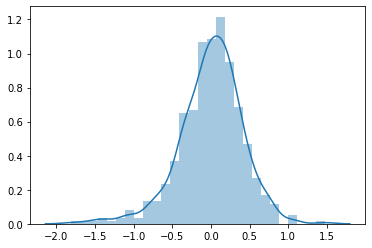

In [42]:
# Calculating residual which is difference b/w y_train & y_train_pred
res = y_train - y_train_pred

# Plotting distribution plot for residual to check if residuals are approximately normally distributed or not.
sns.distplot(res)
plt.show()

<u>Observation:</u>
    1. Residual distribution plot is normally distributed, so one of the Linear regression assumption holds true for selected Model7.

#### Residual Analysis - 2 & 3

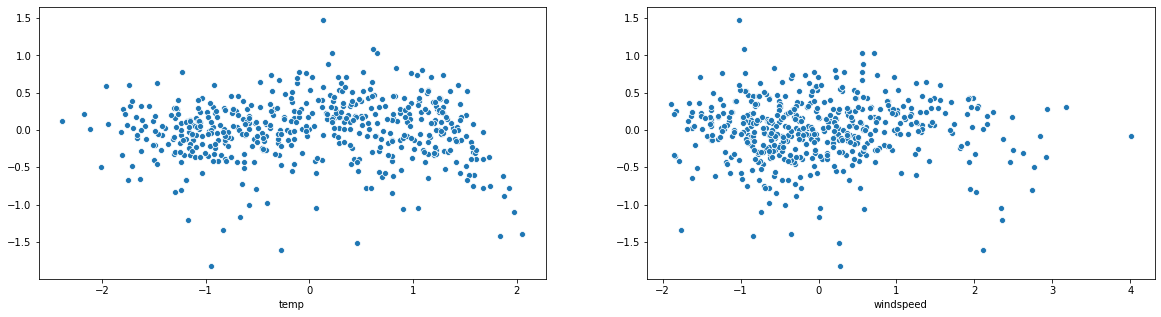

In [43]:
# Checking is there is any relation of continuous independent variables [temp and windspeed] with the error terms (should not find any pattern)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = [20,5])
sns.scatterplot(x = X_train['temp'], y = res,ax = ax1)
sns.scatterplot(x = X_train['windspeed'], y = res,ax = ax2)
plt.show()

Observations:
    1. There is no visible trend of error terms with temp or windspeed.
    2. There is constant variance of error terms with temp and windspeed. [homoscedasticity]

#### Checking Adjusted R-squared for both training and test Dataset

In [44]:
# For training Dataset (X_train_sm)

print(Model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          1.13e-186
Time:                        10:32:42   Log-Likelihood:                -271.78
No. Observations:                 511   AIC:                             563.6
Df Residuals:                     501   BIC:                             605.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6370      0.03

<b> Training set ealuation :</b> R-squared = 0.830 and Adjusted R-squared = 0.827

In [45]:
# adding constant for test set
y_test = df_test.pop('cnt')
X_test = df_test[X_train.columns]

X_test_sm = sm.add_constant(X_test)

# Pred on test
y_test_pred = Model7.predict(X_test_sm)

In [46]:
# importing required libraries to find R2 score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
# Calculating R-squared and Adjusted R_squared values
r2_test = r2_score(y_true = y_test,y_pred = y_test_pred)
r2_test

n = X_test.shape[0]
p = X_test.shape[1]
r2_test_adj = 1 - (1-r2_test)*(n-1)/(n-p-1) 


r2_train = r2_score(y_true = y_train,y_pred = y_train_pred)
r2_train

n = X_train.shape[0]
p = X_train.shape[1]
r2_train_adj = 1 - (1-r2_test)*(n-1)/(n-p-1)

print(f'r2_test_adj : {r2_test_adj},r2_test : {r2_test},r2_train_adj : {r2_train_adj},r2_train : {r2_train}')

r2_test_adj : 0.784991668990572,r2_test : 0.7938681597203191,r2_train_adj : 0.7901651925296662,r2_train : 0.8303714378108198


### Assignment-based Subjective Questions 

In [48]:
# Printing coeff value for Model-7
Model7.params

const               -0.636987
fall                 0.392177
winter               0.581491
Dec                  0.449650
Cloudy              -0.351141
LightThunderstorm   -1.263077
yr                   1.039575
holiday             -0.441654
temp                 0.550429
windspeed           -0.115575
dtype: float64

<u> Observations for Catagorical Variables: </u><br>
<b> fall </b> : It is positively related to cnt, so it is possible that people like to drive bikes during season of Autumn or falling leaves.<br>
<b> winter </b> : It is positively related to cnt, so it is possible that people like to drive bikes during winters.<br>
<b>  Dec </b> : It is positively related to cnt, so it is possible that people like to drive bikes during Dec.[inline with winter] <br>
<b> Cloudy </b> : It is negatively related to cnt, so it is possible that people fear rain when weather is cloudy so they dont like to drive during cloudy weather.<br>
<b> Light Thunderstorm </b> : It is highly negatively related to cnt, so it is possible that people dont want to drive during rain due to risk of accident or getting drenched in rain etc. <br>
<b> yr </b> : It is highly positively related to cnt, so it is possible that cnt is increasing from one year to another due to increasing awareness/advertisment for BoomBikes.<br>
<b> holiday </b> : It is negatively related to cnt, so it is possible that people dont use BoomBikes much during holidays as it may be used more to get to office etc.

It is important to drop since if one of the columns is not dropped then it will become redundant in explaining dependent variable.
However, it is not absolutely necessary to drop first column only, any one column can be dropped.

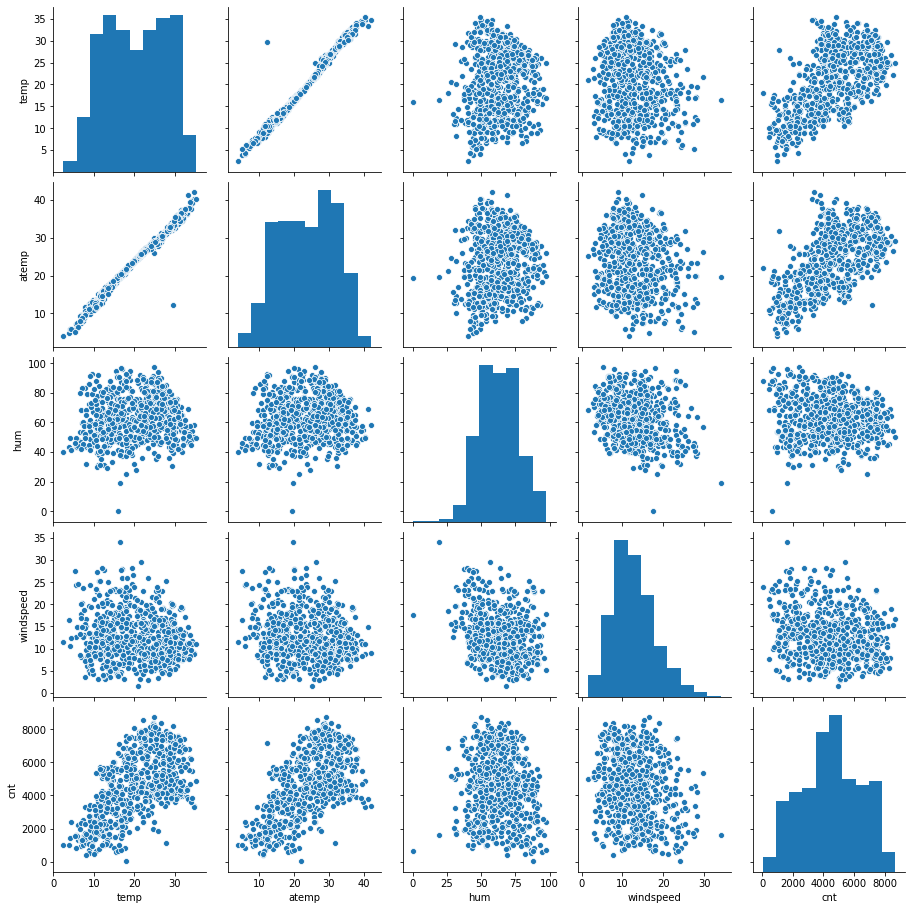

In [56]:
# Creating pairplot amoung continuous independent variable and target variable.
sns.pairplot(data[['temp','atemp','hum','windspeed','cnt']])
plt.show()

<u> Observation: </u>
It can be seen that temp and atemp are the most correlated features for cnt. 

In [60]:
# Printing slopes for all features for the trained final model7.
print(Model7.params)

const               -0.636987
fall                 0.392177
winter               0.581491
Dec                  0.449650
Cloudy              -0.351141
LightThunderstorm   -1.263077
yr                   1.039575
holiday             -0.441654
temp                 0.550429
windspeed           -0.115575
dtype: float64


### General Subjective Questions 

Anscombe’s quartet consists of 4 data series having same descriptive statstical parameters ex., mean, r-squared, regression line etc. but having very different distributions.

Dataset:

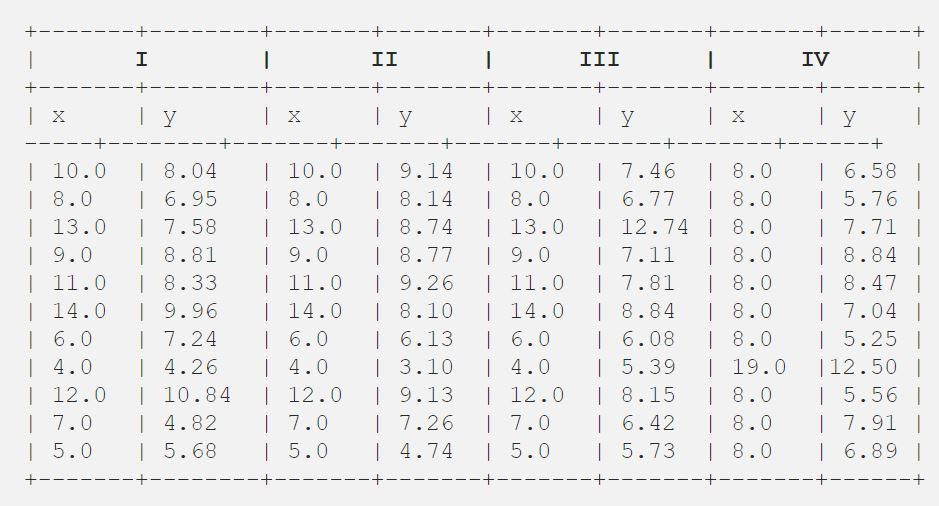

Descriptive Statistics Summary:

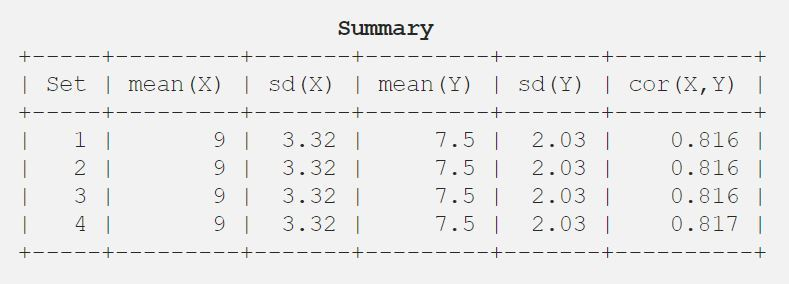

Disributions for the datasets:

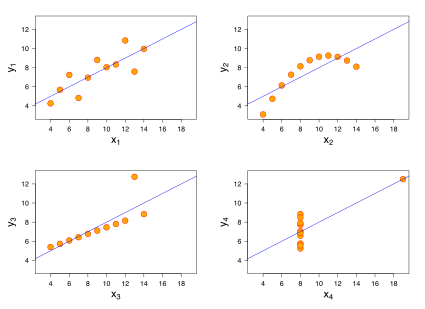

Pearson's r is a numerical summary of the strength of the linear association between the variables. If the variables tend to go up and down together, the correlation coefficient will be positive. If the variables tend to go up and down in opposition with low values of one variable associated with high values of the other, the correlation coefficient will be negative.

r = 1 means the data is perfectly linear with a positive slope ( i.e., both variables tend to change in the same direction)
<br>
r = -1 means the data is perfectly linear with a negative slope ( i.e., both variables tend to change in different directions)
<br>
r = 0 means there is no linear association
<br>
r > 0 < 5 means there is a weak association
<br>
r > 5 < 8 means there is a moderate association
<br>
r > 8 means there is a strong association

Similar holds true for negative pearson R values too.

Formula for Pearson R:

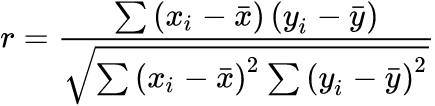

where x,y are individual observations and xbar,ybar are mean for x and y observations.

In [ ]:
Scaling is a process of redistributing the data to be more uniform and easy for linear regression algorithm to work.

Scaling is performed in cases where the scale of features within themselves is very different i.e., if one feature is in a range of 1 to 10 and other is in millions.
In such a case, gradient descent algorithm takes more number of steps to optimize as compared to the case when data is scaled.

Normalized scaling means that the data is normally distributed i.e., variance = 1 and Stanardized scaling means that data is normally distributed with mean = 0 as well.

Data can be normalized by dividing the data by range of data for particular feature.
Data can be standardized by subtacting the data by mean of data and dividing by range of data for particular feature.

Infinite value of VIF means that a particular feature is fully explained by linear combination of other features in the dataset.